## Hypothesis Testing with Insurance Data (Core)


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [70]:
filename = 'Data/insurance - insurance.csv'
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Question 1

Q1. Do smokers have higher insurance charges than non-smokers?
- Null Hypothesis: There is no difference between higher insurance chargers between smokers and non-smokers
- Alternative Hypothesis: There is a difference in insurance charges between smokers and non-smokers

- 2 sample/groups - numeric 2 sample T test

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [72]:
smoker = df.loc[df['smoker']=='yes',"charges"]
non_smoker = df.loc[df['smoker']=='no',"charges"]

In [73]:
smoker

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [74]:
#check for outliers
smoker_outliers = np.abs(stats.zscore(smoker)) > 3
smoker_outliers.sum()

0

In [75]:
#check for outliers
non_smoker_outliers = np.abs(stats.zscore(non_smoker)) > 3
non_smoker_outliers.sum()

24

In [76]:
## remove outliers from non_smoker
non_smoker_cln = non_smoker[non_smoker_outliers==False]
non_smoker_cln

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [77]:
# normal test smoker
result_s = stats.normaltest(smoker)
result_s

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [78]:
# normal test non smoker
result_ns = stats.normaltest(non_smoker_cln)
result_ns

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [79]:
len(smoker), len(non_smoker_cln)

(274, 1040)

Our n is large enough to pass the normality

In [80]:
result = stats.levene(smoker, non_smoker_cln)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Since our p value is < .05, we will set equal_var to False in our TTest

In [81]:
smoker_final = stats.ttest_ind(smoker, non_smoker_cln, equal_var = False)
smoker_final

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

In [82]:
smoker.mean()

32050.23183153284

In [83]:
non_smoker_cln.mean()

7939.8608446721155

We reject our null hypothesis. There is significant statistics to support that there is a difference in chargers between smokers and non smokers

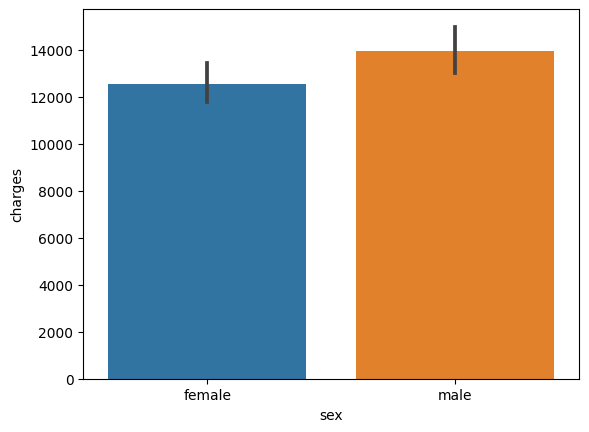

In [84]:
sns.barplot(data=df, x='sex',y='charges');

# Question 2

 Q2. Are men more likely to smoke than women?
 
- Null Hypothesis: There is no difference between men and women likely to smoke
- Alternative Hypothesis: There is a difference in men and women who are likely to smoke

- 2 sample/groups - categorical Chi-Square

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [86]:
male = df.loc[df['sex']=='male',"smoker"]
female = df.loc[df['sex']=='female',"smoker"]

In [87]:
male.value_counts()

no     517
yes    159
Name: smoker, dtype: int64

In [88]:
female.value_counts()

no     547
yes    115
Name: smoker, dtype: int64

Assumptions:
- there are two categorical variables (male, female)
- the outcomes are independent

In [89]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [90]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [91]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Since our p < .05, we reject our null hypothesis. There is support that there is a relationship between gender for smoking

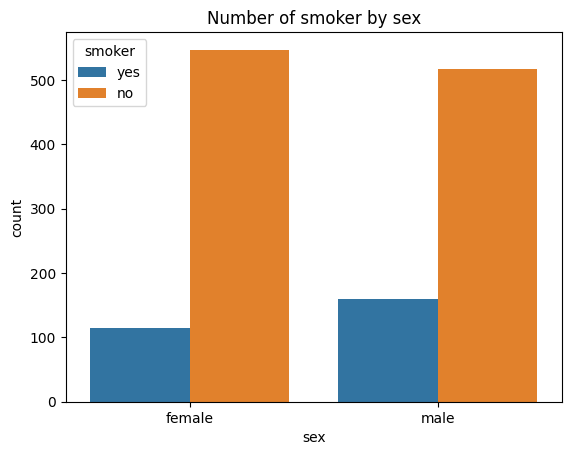

In [92]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smoker by sex");

# Question 3

- Q3. Do different regions have different charges, on average?
 
- Null Hypothesis: There is no difference between regions and chargers
- Alternative Hypothesis: There is a difference in regions and chargers

- 4 sample/groups - numeric chargers (ANOVA and/or Tukey)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [95]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [96]:
# Testing Assumptions
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [97]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


It is not normally distributed, but n is over 15 

In [98]:
southwest = df.loc[df['region']=='southwest',"charges"]
southeast = df.loc[df['region']=='southeast',"charges"]
northwest = df.loc[df['region']=='northwest',"charges"]
northeast = df.loc[df['region']=='northeast',"charges"]

In [99]:
#check for outliers
southwest_outliers = np.abs(stats.zscore(southwest)) > 3
southwest_outliers.sum()

8

In [100]:
#check for outliers
southeast_outliers = np.abs(stats.zscore(southeast)) > 3
southeast_outliers.sum()

2

In [101]:
#check for outliers
northwest_outliers = np.abs(stats.zscore(northwest)) > 3
northwest_outliers.sum()

7

In [102]:
#check for outliers
northeast_outliers = np.abs(stats.zscore(northeast)) > 3
northeast_outliers.sum()

4

In [103]:
## remove outliers from southwest
southwest_cln = southwest[southwest_outliers==False]
southwest_cln

0       16884.92400
12       1826.84300
15       1837.23700
18      10602.38500
19      36837.46700
           ...     
1316     1731.67700
1329    10325.20600
1331    10795.93733
1332    11411.68500
1336     2007.94500
Name: charges, Length: 317, dtype: float64

In [104]:
## remove outliers from southeast
southeast_cln = southeast[southeast_outliers==False]
southeast_cln

1        1725.5523
2        4449.4620
5        3756.6216
6        8240.5896
11      27808.7251
           ...    
1322    12981.3457
1323    43896.3763
1327     9377.9047
1330    12629.1656
1335     1629.8335
Name: charges, Length: 362, dtype: float64

In [105]:
## remove outliers from northwest
northwest_cln = northwest[northwest_outliers==False]
northwest_cln

3       21984.47061
4        3866.85520
7        7281.50560
9       28923.13692
24       6203.90175
           ...     
1319     7201.70085
1320     5425.02335
1324     4239.89265
1333    10600.54830
1337    29141.36030
Name: charges, Length: 318, dtype: float64

In [106]:
## remove outliers from northeast
northeast_cln = northeast[northeast_outliers==False]
northeast_cln

8        6406.41070
10       2721.32080
16      10797.33620
17       2395.17155
20      13228.84695
           ...     
1321    28101.33305
1325    13143.33665
1326     7050.02130
1328    22395.74424
1334     2205.98080
Name: charges, Length: 320, dtype: float64

In [107]:
# equal variance test with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

Since p < .05, we did not meet the equality test. We will set equal_var to false

In [108]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [109]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [110]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


There is no significant difference between:
- Northeast to Northwest
- Northeast to Southeast
- Northeast to Southwest
- Northwest to Southeast
- Northwest to Southwest

There is significant difference between
- Southeast to Southwest

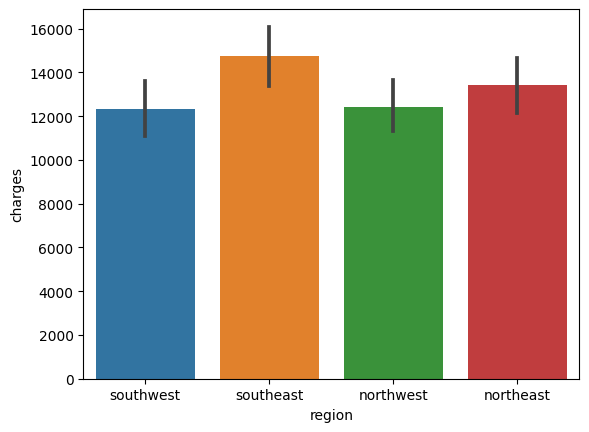

In [111]:
sns.barplot(data=df, x='region',y='charges');